# Importamos librerías

In [1]:
import etl
import kaggle

# Usamos la función desarrollada para automatizar el ETL, en este caso subre la extracción y almacenamiento en área de staging

In [2]:
kaggle.api.dataset_download_files("fedesoriano/electric-power-consumption", unzip=True)
file_input = etl.extraer_a_staging()

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption
Conexión exitosa
La base de datos 'proyect1_db' ya existe.
Datos cargados en la base de datos exitosamente.
Dataset almacenado en área de staging:
               datetime  temperature  humidity  wind_speed  \
0         1/1/2017 0:00        6.559      73.8       0.083   
1         1/1/2017 0:10        6.414      74.5       0.083   
2         1/1/2017 0:20        6.313      74.5       0.080   
3         1/1/2017 0:30        6.121      75.0       0.083   
4         1/1/2017 0:40        5.921      75.7       0.081   
...                 ...          ...       ...         ...   
52411  12/30/2017 23:10        7.010      72.4       0.080   
52412  12/30/2017 23:20        6.947      72.6       0.082   
52413  12/30/2017 23:30        6.900      72.8       0.086   
52414  12/30/2017 23:40        6.758      73.0       0.080   
52415  12/30/2017 23:50        6.580      74.1       0.081   

       general_diffuse_f

# Iniciamos el análisis exploratorio de los datos (EDA)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Veamos el encabezado del dataset
file_input.head(10)

,datetime,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,power_consumption_zone1,power_consumption_zone2,power_consumption_zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
5,1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
6,1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
7,1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
8,1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217
9,1/1/2017 1:30,5.491,77.3,0.082,0.062,0.111,24279.49367,15939.20973,16794.21687


In [6]:
file_input.info()
file_input.describe()  # Resumen estadístico de columnas numéricas
file_input.describe(include="object")  # Estadísticas de columnas categóricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   datetime                 52416 non-null  object 
 1   temperature              52416 non-null  float64
 2   humidity                 52416 non-null  float64
 3   wind_speed               52416 non-null  float64
 4   general_diffuse_flows    52416 non-null  float64
 5   diffuse_flows            52416 non-null  float64
 6   power_consumption_zone1  52416 non-null  float64
 7   power_consumption_zone2  52416 non-null  float64
 8   power_consumption_zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


,datetime
count,52416
unique,52416
top,12/30/2017 21:10
freq,1


datetime                   0
temperature                0
humidity                   0
wind_speed                 0
general_diffuse_flows      0
diffuse_flows              0
power_consumption_zone1    0
power_consumption_zone2    0
power_consumption_zone3    0
dtype: int64


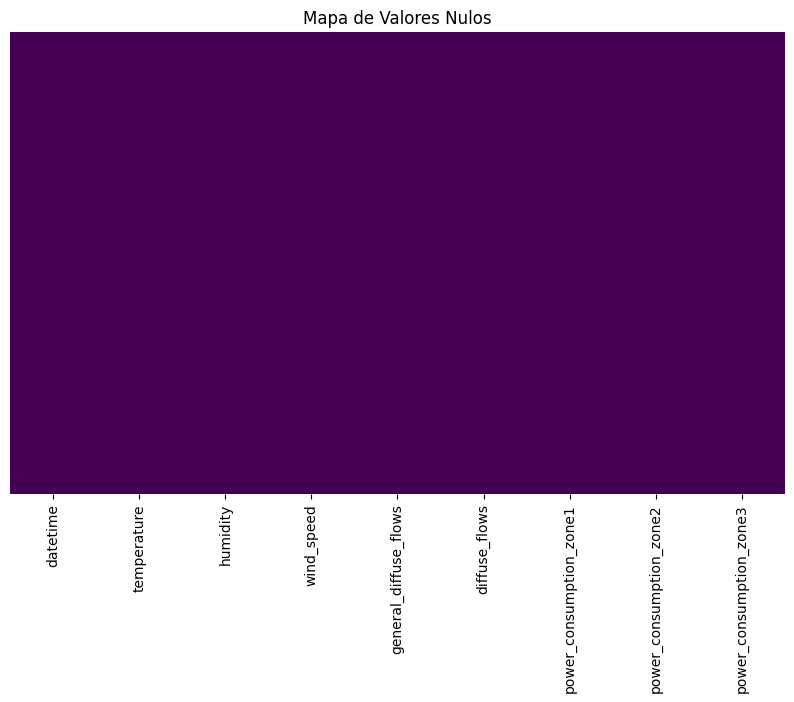

In [7]:
# Contar valores nulos
print(file_input.isnull().sum())

# Visualizar valores nulos
plt.figure(figsize=(10, 6))
sns.heatmap(file_input.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Mapa de Valores Nulos")
plt.show()

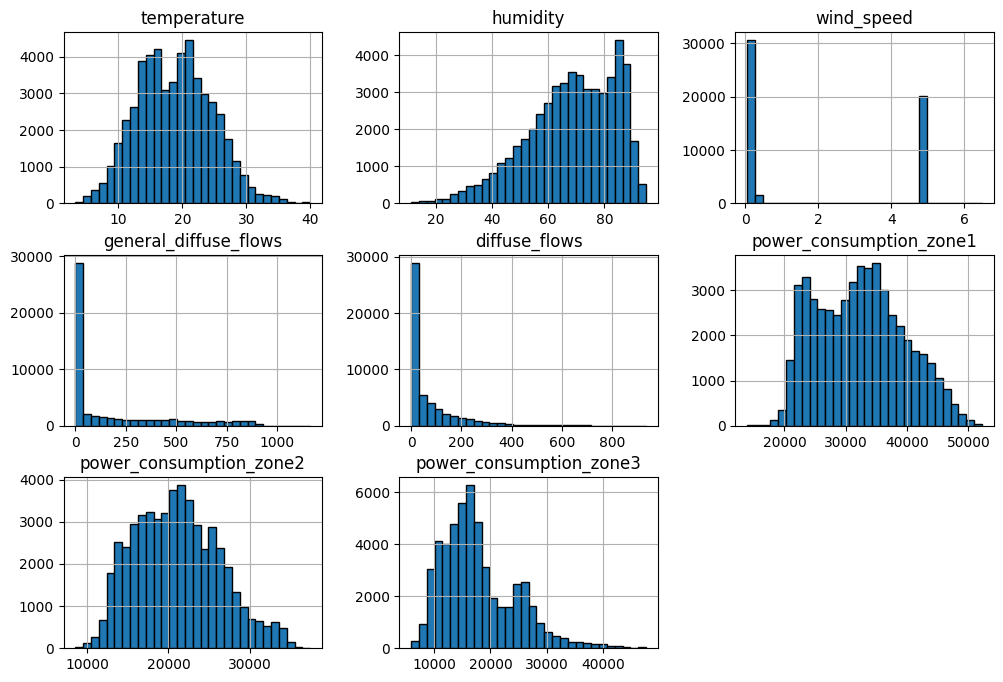

In [8]:
file_input.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.show()

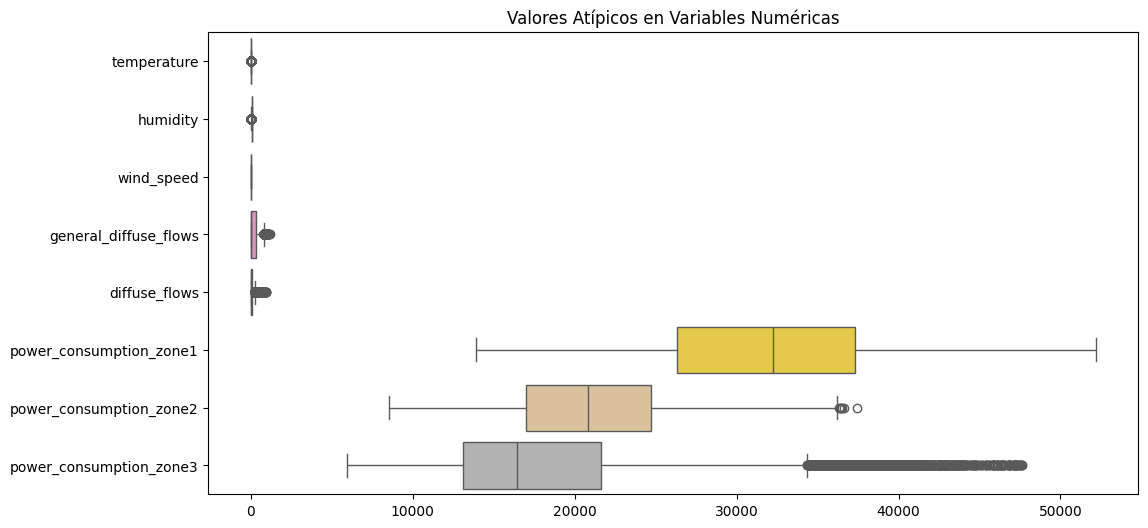

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=file_input.select_dtypes(include=np.number), orient="h", palette="Set2")
plt.title("Valores Atípicos en Variables Numéricas")
plt.show()

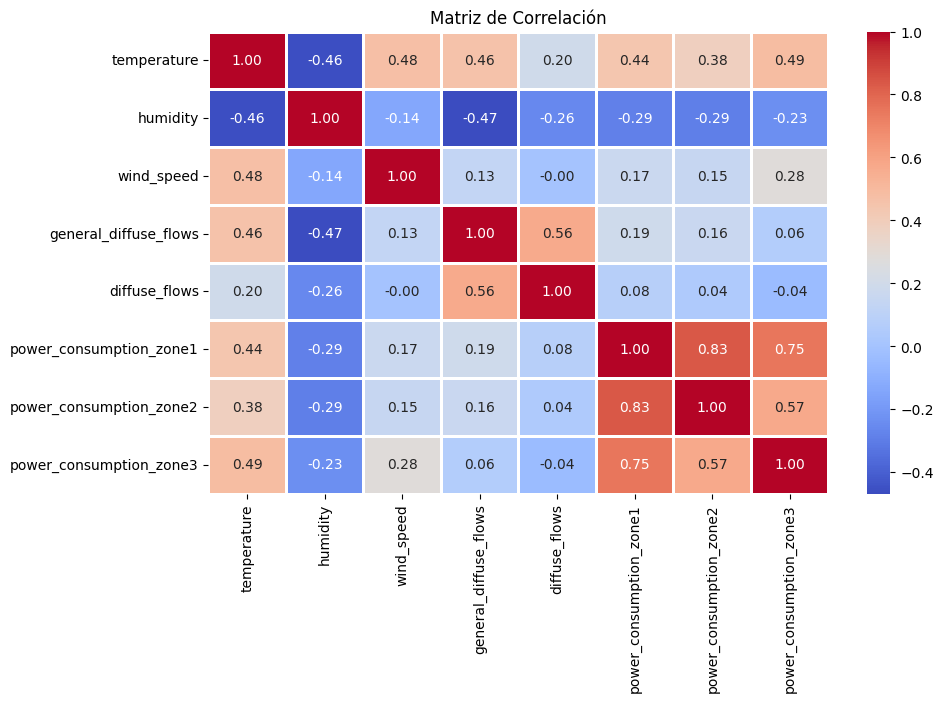

In [11]:
#df = df.drop ('city', axis = 1)
plt.figure(figsize=(10, 6))
sns.heatmap(file_input.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Matriz de Correlación")
plt.show()

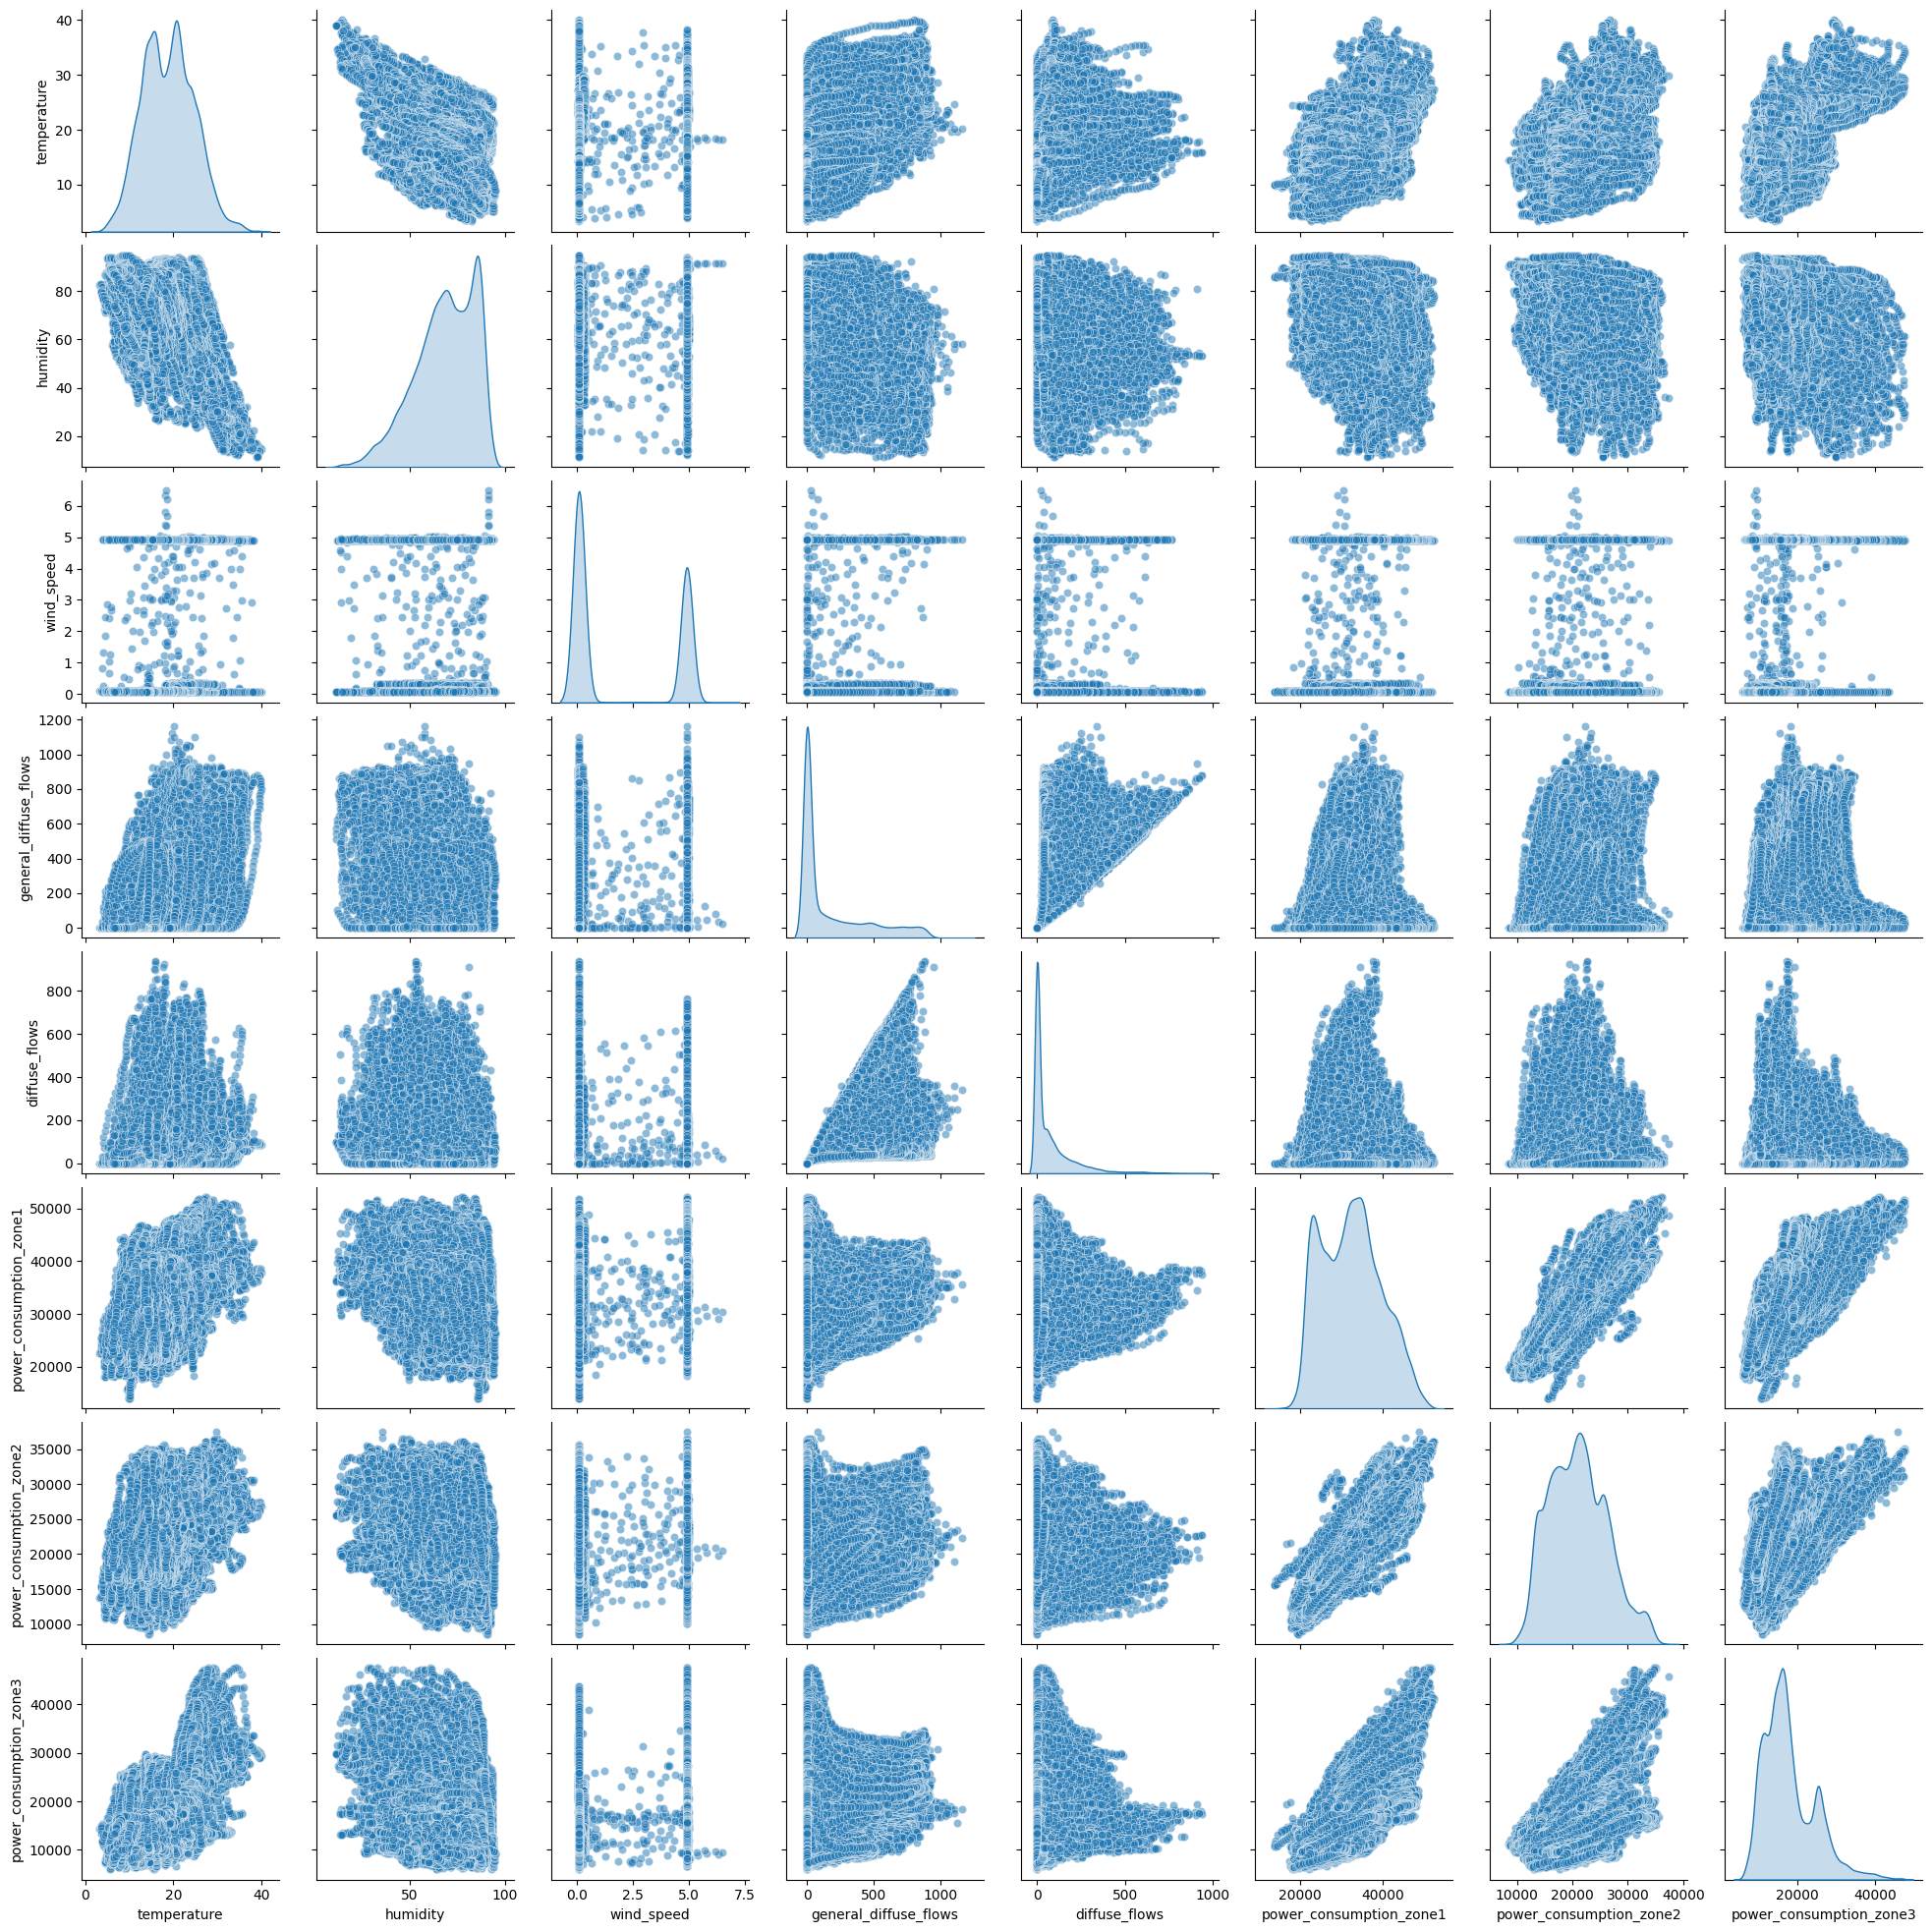

In [12]:
sns.pairplot(file_input, diag_kind="kde", plot_kws={'alpha':0.5})
plt.show()